<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/10_decision_tree_%26_ensemble_techniques/Case_Study_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Restaurant Booking Trends with Boosting Algorithms



### Context

Welcome to the **Scaler Hospitality** Analytics team! Our current initiative aims to enhance the booking management system for a chain of restaurants. Your expertise is requested to analyze the Restaurant Booking dataset, utilizing boosting algorithms to predict booking statuses and understand customer behaviors. This task will support strategic decision-making to optimize booking operations and enhance customer satisfaction.

### Dataset Description

The dataset you will analyze contains a variety of attributes related to restaurant bookings. These details offer insights into customer preferences, booking patterns, and cancellation trends. Each booking record is characterized by several features:

### Booking Attributes:
- **id:** Unique identifier for each booking.
- **no_of_adults:** Number of adults per booking.
- **no_of_children:** Number of children per booking.
- **no_of_weekend_nights:** Number of weekend nights booked.
- **no_of_week_nights:** Number of weekday nights booked.
- **type_of_meal_plan:** Type of meal plan selected (e.g., bed and breakfast, all-inclusive).
- **required_car_parking_space:** Indicates if a parking space was required.
- **room_type_reserved:** Type of room reserved.
- **lead_time:** Number of days between the booking date and the arrival date.
- **arrival_year, arrival_month, arrival_date:** Date details for when the booking is scheduled.
- **market_segment_type:** The market segment from which the booking originated.
- **repeated_guest:** Flag indicating if the guest has booked before.
- **no_of_previous_cancellations:** Number of prior cancellations by the guest.
- **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the guest.
- **avg_price_per_room:** Average price per room type.
- **no_of_special_requests:** Number of special requests made by the guest.
- **booking_status:** Status of the booking ( confirmed = 0, canceled = 1).

Your objective is to use boosting techniques to predict the 'booking_status' and analyze factors that influence booking behaviors. This analysis will help in identifying key trends that could influence policy adjustments, promotional strategies, and operational improvements.

In [1]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/435/original/booking.csv"

--2025-01-09 17:19:13--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/435/original/booking.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.181, 13.224.9.129, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2141217 (2.0M) [text/plain]
Saving to: ‘booking.csv’

booking.csv         100%[===================>]   2.04M  --.-KB/s    in 0.06s   

2025-01-09 17:19:13 (35.8 MB/s) - ‘booking.csv’ saved [2141217/2141217]



In [2]:
import pandas as pd

df = pd.read_csv("booking.csv")

df_original = df.copy()

Target = 'booking_status'
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
X = df_original.drop(Target, axis = 1)
y = df_original[Target]

df_original[Target].value_counts()

,count
booking_status,
0,25596
1,16504




---

# Assesments for Boosting 1

### Analyzing Restaurant Booking Patterns

#### Context:
Welcome to the **Scaler Hospitality** Analytics team! We're diving into the Restaurant Booking dataset to enhance our booking management system. Your insights will help us optimize operations and improve customer experiences.

#### Task:
Your initial task is to conduct an exploratory data analysis to uncover insights about unusual booking patterns, specifically, bookings where neither adults nor children are included.

#### Instructions:
1. **Data Inspection:** Examine the dataset for entries that indicate bookings with zero adults and zero children.
2. **Count Such Bookings:** Calculate the number of such instances to understand the prevalence of this anomaly.

#### Question:
Based on the dataset provided, how many bookings are recorded where both the number of adults and the number of children are zero?

#### Options:
A) 147 bookings

B) 16 bookings

C) 2 bookings

D) 0 bookings



In [6]:
# TODO: Examine the dataset for entries with zero adults and zero children

booking_counts = df_original[(df_original['no_of_adults'] == 0) & (df_original['no_of_children'] == 0)].shape[0] # Hint: Use 'no_of_adults' and 'no_of_children' column to extract this information
print("Number of bookings with zero adults and zero children:", booking_counts)

Number of bookings with zero adults and zero children: 16




---

### Booking Status Distribution by Month

#### Context:
Understanding seasonal trends in booking cancellations can help the Scaler Hospitality Analytics team develop targeted strategies to minimize losses and improve customer retention. You are tasked with visualizing how booking statuses vary by month.

#### Task:
Create a visual representation to analyze the distribution of booking cancellations across different months using the 'arrival_month' and 'booking_status' columns in the dataset.

#### Instructions:
1. **Group and Count Data:** Use the dataset to group entries by 'arrival_month' and 'booking_status'. Count the occurrences of each booking status (canceled or not canceled) for every month.
2. **Visualize Data:** Generate a bar chart that displays the counts of canceled and not canceled bookings for each month. This will help in visually comparing the booking trends over the year.
3. **Analyze Trends:** Examine the bar chart to determine which month has the highest number of cancellations and which has the lowest.

#### Question:
After analyzing the bar chart representing the booking status count for each month, identify the months with the highest and lowest number of booking cancellations.

#### Options:
A) Highest: August, Lowest: January

B) Highest: December, Lowest: February

C) Highest: July, Lowest: November

D) Highest: May, Lowest: March

booking_status     0     1
arrival_month             
1                747    58
2                884   317
3               1577   624
4               1924  1082
5               1955  1337
6               1945  1411
7               2463  2218
8               2722  3041
9               2981  2167
10              3530  2923
11              2029   774
12              2839   552


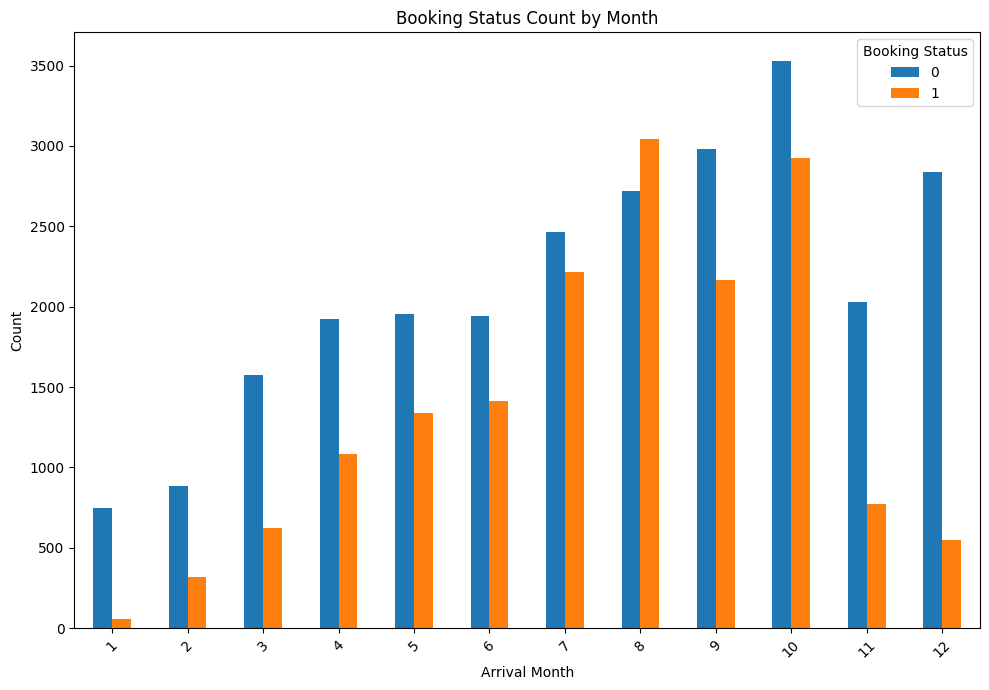

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Create a pivot table to count booking status for each month
booking_status_counts = df_original.pivot_table(index='arrival_month', columns='booking_status', aggfunc='size', fill_value=0)
 # Hint: Use 'arrival_month' and 'booking_status' columns and convert into pivot.

print(booking_status_counts)

# Plotting using the pivot table
booking_status_counts.plot(kind='bar', figsize=(10, 7)) # Hint: use bar plot
plt.title('Booking Status Count by Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()



---

### Date Engineering

#### Context:
Effective date engineering can uncover deeper insights in time-series data such as hotel bookings. This task involves transforming basic date-related columns into a comprehensive set of datetime features that can be used for advanced analysis and model building.

#### Task:
Develop a Python function named `process_arrival_date` that converts basic date fields in a hotel booking dataset into a rich set of datetime features. This function should handle data transformation and cleanup efficiently.

#### Function Requirements:
1. **Input and Output:** The function should accept a DataFrame and return a modified DataFrame with new datetime-related features.
2. **Rename Columns:** Change 'arrival_year', 'arrival_month', and 'arrival_date' to 'year', 'month', and 'day'.
3. **Create Datetime Column:** Combine 'year', 'month', and 'day' into a new 'date' column as a datetime object. Use `pd.to_datetime` with `errors='coerce'` to handle any data inconsistencies.
4. **Extract Datetime Features:** From the 'date' column, derive and add new columns such as 'year', 'month', 'week', 'day', 'dayofweek', 'quarter', and 'dayofyear'.
5. **Cleanup:** Remove any intermediate columns like the temporary 'date' column after extracting necessary features.

#### Instructions:
- **Define the Function:** Implement the `process_arrival_date` function based on the above requirements.
- **Apply the Function:** Test the functionality of your function by applying it to a DataFrame `df`.
- **Verify Output:** Check the resulting DataFrame to ensure it includes all new date-related features and excludes any redundant or temporary columns.

#### Question:
After applying the `process_arrival_date` function to a DataFrame and transforming the date-related columns, what are the number of missing values (NaN) in the newly created columns?

#### Options:
A) 0

B) 50

C) 100

D) 43



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def process_arrival_date(data):
    # Remove any pre-existing date columns that could conflict with the new transformations
    data.drop(columns=['year', 'month', 'day'], inplace=True, errors='ignore')

    # Renaming columns for uniformity
    temp = data.rename(columns={
        'arrival_year': 'year',
        'arrival_month': 'month',
        'arrival_date': 'day'
    })

    # TODO: Creating a datetime column from the year, month, and day columns
    data['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')

    # TODO: Extract date features
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.isocalendar().week.astype(float)
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['dayofyear'] = data['date'].dt.dayofyear

    # Cleanup: Remove 'date' column after extracting necessary features
    data.drop(columns=["date"], inplace=True)
    return data

# Test the function by applying it to a DataFrame 'df'
new_processed_df = process_arrival_date(df)

# Display missing values in the newly created columns to check for any NaN entries
missing_values = new_processed_df.isna().sum()
print(missing_values)

id                                       0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
year                                    50
month                                   50
week                                    50
day                                     50
dayofweek  



---


### Sequencing Steps in Boosting Algorithm

#### Context:
Boosting is a powerful ensemble machine learning technique that combines multiple weak learners to form a strong predictive model. Each learner is sequentially added, specifically focusing on the errors of the previous models.

#### Task:
Organize the steps involved in the implementation of a boosting algorithm. This will test your understanding of the sequential nature of how boosting models are constructed and optimized.

#### Question
Consider the key points listed about the boosting algorithm process. Put the following steps in the correct order, from first to last, as they would occur in the implementation of a boosting algorithm. <br

#### Steps to Sequence:
<ol>
<li>Sequential Model Development</li>
<li>Base Learner Initialization</li>
<li>Initiation with a Preliminary Model</li>
<li>Combination through Addition</li>
<li>Prediction Weight Adjustment</li>
</ol>

#### Options
A] 2, 3, 1, 4, 5

B] 3, 2, 1, 5, 4

C] 2, 3, 4, 1, 5

D] 3, 1, 2, 5, 4





---

### Simple Boosting Algorithm

#### Context:
Boosting is an ensemble technique that combines multiple weak learners to create a strong classifier. Each weak learner is trained sequentially, with each one focusing on the errors made by the previous models.

#### Task:
Complete the Python code provided to implement a simple boosting algorithm using two Decision Tree classifiers. Then, determine the accuracy of the combined model.

#### Instructions:
1. **Fill in the Blanks:** Complete the Python code where indicated (blanks marked with `__1__`, `__2__`, `__3__`, and `__4__`) to ensure the boosting algorithm functions correctly.
2. **Run the Code:** Execute the completed code on your dataset to train the Decision Trees and combine their predictions.
3. **Verify and Analyze Results:** Calculate the accuracy of the final combined prediction and select the correct answer based on the output.

Note: Target = 'booking_status', y = df[Target] and X = df.drop(Target, axis = 1)

#### Question:
After implementing the described boosting process and running the complete code, what is the accuracy of the final combined predictions?

#### Options:
A) Above 90%

B) Between 80% and 90%

C) Between 70% and 80%

D) Below 70%


In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize weights
weights = np.ones(len(X)) / len(X)

# Train first weak learner
dt1 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt1.fit(X, y)
y_pred_1 = dt1.predict(X)

# Update weights function
def update_weights(y, y_pred, weights):
    for i in range(len(weights)):
        if y[i] != y_pred[i]: # Hint: If actual value is not same as predicted value.
            weights[i] *= 1.5  # Increase the weight for misclassified instances
        else:
            weights[i] *= 0.5  # Decrease the weight for correctly classified instances
    return weights / np.sum(weights)  # Normalize the weights

# Apply first learner and update weights
weights = update_weights(y, y_pred_1, weights) # Hint: update weights using actual and predicted.

# Train second weak learner
dt2 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt2.fit(X, y, sample_weight= weights)   # Utilize updated weights for learning for this sample_weight is used.
y_pred_2 = dt2.predict(X)

# Combine the weak learners' predictions
# Assuming a simple average for combination of both the predictions
final_prediction = np.round((y_pred_1 + y_pred_2) / 2.0).astype(int)

# Calculate the accuracy
final_accuracy = accuracy_score(y, final_prediction)
print(f"Final combined prediction accuracy: {final_accuracy}")

Final combined prediction accuracy: 0.7140380047505939




---
## Boosting Steps residual

#### Context:
Gradient Boosting is an advanced boosting technique that builds models sequentially, each new model correcting errors made by the previous ones. A key component of Gradient Boosting involves the use of pseudo residuals to guide the learning of subsequent models.

#### Task:
Organize the steps involved in using pseudo residuals within a Gradient Boosting framework. This task will test your understanding of the methodical process through which boosting models iteratively enhance their accuracy.

#### Steps:

1. Train a new learner on the pseudo residuals.
2. Calculate pseudo residuals based on the loss function's derivative.
3. Initialize the model with a simple estimator (e.g., the mean of the target variable).
4. Update the model by adding the new learner, scaled by the learning rate.
5. Evaluate the current model and calculate the loss for each instance.

#### Question

Arrange the following steps to reflect how pseudo residuals are used in the iterative process of boosting.


Options:

A. 3, 5, 2, 1, 4

B. 5, 2, 1, 3, 4

C. 2, 3, 1, 4, 5

D. 3, 1, 5, 2, 4









---

## Code Boosting resedual

#### Context:
Gradient Boosting is a sequential learning technique in regression and classification that builds models progressively, using an ensemble of weak prediction models like decision trees. It focuses on minimizing errors primarily through the use of pseudo residuals.

#### Task:
Complete the Python code provided below to implement a simple gradient boosting algorithm using pseudo residuals. You will fill in the missing parts of the code, run it, and determine the model's accuracy using mean squared error.

#### Instructions:
1. **Fill in the Blanks:** Complete the Python code where indicated (blanks marked with `__1__`, `__2__`, `__3__`, and `__4__`) to ensure the boosting algorithm functions correctly.
2. **Run the Code:** Execute the completed code on your dataset to train the Decision Tree regressors and update the model predictions.
3. **Verify and Analyze Results:** Calculate the final model accuracy using the mean squared error and select the correct accuracy from the given options.


#### Question:
After filling in the blanks and executing the code, what is the final model accuracy based on the mean squared error?

Options:

A. Above 90%

B. Between 80% and 90%

C. Between 70% and 80%

D. Below 70%


In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

y_pred = np.full(shape=y.shape, fill_value=np.mean(y))

# Initialize pseudo residuals
pseudo_residuals = y - y_pred

learning_rate = 0.1

# Train first weak learner on pseudo residuals
dt1 = DecisionTreeRegressor(max_depth=1, random_state=10)
dt1.fit(X, pseudo_residuals)
y_pred_1 = dt1.predict(X)

# Update model predictions
y_pred += y_pred_1 * learning_rate # Hint: use learning rate.

# Calculate new pseudo residuals
pseudo_residuals = y - y_pred

# Train second weak learner on new pseudo residuals
dt2 = DecisionTreeRegressor(max_depth=1, random_state=10)
dt2.fit(X, pseudo_residuals)
y_pred_2 = dt2.predict(X)

# Update model predictions
y_pred += y_pred_2* learning_rate

# Calculate the accuracy using the mean squared error as a measure of accuracy for regression
final_accuracy = 1 - mean_squared_error(y, y_pred)
print(f"Final model accuracy: {final_accuracy}")

Final model accuracy: 0.7740567736555297




---

## Comparing Gradient Boosting Performance


#### Context:
Effectively preprocessing data can significantly impact the performance of machine learning models. This task involves evaluating how a Gradient Boosting Classifier performs on both an original dataset and the same dataset after preprocessing and missing value removal.

#### Task:
Implement a Gradient Boosting Classifier and assess its accuracy on both the original and a preprocessed version of a dataset. This will help determine the impact of preprocessing on model performance.

#### Instructions:
1. **Split Original Data:** Use `train_test_split` to divide the original dataset (`df`) into training and test sets, setting `test_size` to 0.2 and `random_state` to 10.
2. **Train on Original Data:** Fit a `GradientBoostingClassifier` on the original training data and evaluate its accuracy on the original test set.
3. **Preprocess the Dataset:** Apply the `process_arrival_date` function and remove rows with missing values to create a cleaned dataset (`new_processed_df`).
4. **Split Preprocessed Data:** Split the preprocessed dataset (`new_processed_df`) into training and test sets, again with a `test_size` of 0.2 and `random_state` to 10.
5. **Train on Preprocessed Data:** Train a new `GradientBoostingClassifier` on the preprocessed training data and evaluate its accuracy on the preprocessed test set.
6. **Compare Accuracies:** Assess whether the model's accuracy improved, declined, or remained the same after preprocessing.

#### Question:
After implementing the Gradient Boosting Classifier and comparing its performance on both the original and the preprocessed datasets, which statement accurately describes the change in accuracy?

#### Options:
A) The accuracy is higher on the original dataset.

B) The accuracy is higher on the preprocessed dataset.

C) The accuracy remains the same on both datasets.

D) The accuracy comparison cannot be determined without further information.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# TODO: Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=10)

# TODO: Train Gradient Boosting Classifier on original data
gbc_orig = GradientBoostingClassifier(random_state=10)
gbc_orig.fit(X_train_orig, y_train_orig)
pred_orig = gbc_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, pred_orig)

# Using the Processed dataset from the previous process_arrival_date
new_df = new_processed_df.dropna()

# TODO: Split processed data (ensure to select the same target variable 'y')
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(new_df.drop(Target, axis = 1), new_df['booking_status'], test_size=0.2, random_state=10)

# TODO: Train Random Forest on processed data
gbc_proc = GradientBoostingClassifier(random_state=10)
gbc_proc.fit(X_train_proc, y_train_proc)
pred_proc = gbc_proc.predict(X_test_proc)
accuracy_proc = accuracy_score(y_test_proc, pred_proc)

# Compare accuracies
print(f"Accuracy on original data: {accuracy_orig}")
print(f"Accuracy on processed data: {accuracy_proc}")

Accuracy on original data: 0.8042755344418052
Accuracy on processed data: 0.8128418549346017




---


# Boosting-2





### GBD Feature Importance

#### Context:
Feature importance is a vital concept in machine learning, allowing data scientists to understand better which features contribute most to a model's predictions. Using a Gradient Boosting Classifier, this task focuses on determining the most influential feature in a dataset.

#### Task:
Train a Gradient Boosting Classifier on a given dataset and analyze the model to identify which feature is considered the most important based on the trained model.

#### Instructions:
1. **Split the Data:** Use `train_test_split` to divide the dataset into training and test sets with a `test_size` of 0.2 and `random_state` of 10.
2. **Train the Model:** Fit a `GradientBoostingClassifier` with default parameters on the training data. Ensure `random_state` is set to 10 for reproducibility.
3. **Extract Feature Importance:** After training, use the model's `feature_importances_` attribute to determine the significance of each feature.
4. **Identify the Most Important Feature:** Determine which feature has the highest importance score.

#### Question:
After training the Gradient Boosting Classifier and examining the feature importance scores, which feature is considered most important?

#### Options:
A) 'no_of_special_requests'

B) 'market_segment_type'

C) 'lead_time'

D) 'avg_price_per_room'


In [ ]:
# TODO: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = _____(X, y, test_size=0.2, random_state=10)

# Initializing and training the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=10)
clf.____(_____, _____)         # Hint: Fit the clasifier with training data

# TODO: Extracting feature importances
feature_importances = ______

# Feature names
features = np.array(X.columns)

# TODO: Identifying the most important feature
most_important_feature = _______

print(f"The most important feature is: {most_important_feature}")

sns.barplot(y= features, x=feature_importances)
plt.show()



---


### Optimizing Learning Rate

#### Context:
The learning rate in gradient boosting models is a crucial parameter that scales the contribution of each tree. It can significantly affect model performance by controlling how quickly the model adapts to the complex underlying patterns in the data.

#### Task:
Your task is to find the optimal learning rate for a Gradient Boosting Classifier applied to the Reservation Cancellation Dataset. This involves comparing the performance of models trained with different learning rates.

#### Instructions:
1. **Split the Data:** Use `train_test_split` to divide the dataset into training and test sets, setting `test_size` to 0.2 and `random_state` to 10.
2. **Define Learning Rates:** Test the classifier's performance across a range of learning rates: {0.1, 0.05, 0.01, 0.005, 0.001}.
3. **Train and Evaluate Models:** For each learning rate, train a `GradientBoostingClassifier` and evaluate its accuracy on the test set.
4. **Determine Optimal Learning Rate:** Identify the learning rate that results in the highest accuracy.

#### Question:
After evaluating Gradient Boosting Classifier models with different learning rates on the Reservation Cancellation Dataset, which learning rate yielded the highest accuracy on the test set?

#### Options:
A) 0.01

B) 0.1

C) 0.05

D) 0.001

E) 0.005



In [ ]:
# Define the learning rates to test
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]
best_accuracy = 0
best_learning_rate = 0

# TODO: Train a model for each learning rate and evaluate its accuracy

for lr in _____: # Hint: iterate over all learning rates
    model = GradientBoostingClassifier(_____=lr, random_state=10)
    model.fit(____, y_train)
    accuracy = accuracy_score(y_test, model.____(X_test))
    print(lr, " : ", accuracy)

    if accuracy ___ best_accuracy:  # Hint: add the necessary condition
        best_accuracy = ____
        best_learning_rate = lr

print(f"The best learning rate is: {best_learning_rate} with an accuracy of: {best_accuracy}")



---


### Boosting Max Depth

#### Context:
The `max_depth` parameter in Gradient Boosting Classifier determines the maximum depth of the individual trees. Adjusting this parameter affects the model's complexity and its ability to capture the underlying patterns in the data, thus influencing performance.

#### Task:
Your task is to identify the optimal `max_depth` value that results in the highest accuracy for a Gradient Boosting Classifier applied to a dataset. This involves training and evaluating the classifier at various tree depths.

#### Instructions:
1. **Prepare Data:** Split the dataset into training and test sets using `train_test_split`, with a `test_size` of 0.2 and `random_state` of 10. Separate the dataset into `X` (features) and `y` (target).
2. **Define Depth Range:** Test the classifier's performance across a range of depths from 1 to 15.
3. **Train and Evaluate Models:** For each depth value, train a `GradientBoostingClassifier` and evaluate its accuracy on the test set.
4. **Determine Optimal Depth:** Identify the depth that results in the highest accuracy.

#### Question:
After training the Gradient Boosting Classifier at different tree depths and evaluating the models, which `max_depth` resulted in the highest accuracy on the test set?

#### Options:
A) 6

B) 7

C) 8

D) 10

Note: Remember to maintain the random_state = 10 in train_test_split and  GradientBoostingClassifier to ensure consistent results. Separate the dataset into X and y, with X comprising all features excluding the target, and y being the target itself.


In [ ]:
acc = []
best_depth = 0
best_acc = 0

# TODO: Train a model for each depth and evaluate its accuracy
for d in range(1,15):
    model = GradientBoostingClassifier(____= d , random_state=10)
    model.____(X_train, ____)
    accuracy = accuracy_score(y_test, ___.predict(X_test))
    acc.append(accuracy)

    if accuracy ___ best_acc:   # Hint: add the necessary condition
      best_acc = accuracy
      best_depth = ___


# Create the line plot
sns.lineplot(x=range(1, 15), y=acc)

# Remove x-ticks
plt.xticks([])

# Add x-axis label
plt.title("Find the max_depth")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Annotate the line at x = best_depth
highest_acc = acc[best_depth - 1]  # Adjusting for zero-based indexing
plt.axvline(x=best_depth, color='gray', linestyle='--')
plt.text(best_depth + 0.2, highest_acc, f"depth = {best_depth}", verticalalignment='center')

# Show the plot
plt.show()



---
### Impact of Feature Scaling

#### Context:
Feature scaling can significantly influence the performance of many machine learning algorithms, particularly those that are distance-based. However, decision trees and their ensembles (like Gradient Boosting) typically do not require feature scaling to perform effectively since they are not sensitive to the scale of the data.

#### Task:
Investigate whether scaling affects the performance of a Gradient Boosting Classifier by training two models: one with scaled features and one with original features.

#### Instructions:
1. **Prepare Data:** Split the dataset into `X` (features) and `y` (target). Then use `train_test_split` to divide the data into training and test sets, setting `test_size` to 0.2 and `random_state` to 10.
2. **Scale Features:** Apply `StandardScaler` to scale `X_train` and `X_test` for the first model.
3. **Train Models:** Train two Gradient Boosting Classifiers—one on the scaled training data and the other on the original training data. Ensure both models use `random_state=10`.
4. **Evaluate Models:** Calculate the accuracy of both models on their respective test sets.
5. **Compare Accuracies:** Calculate the difference in accuracy between the scaled and the unscaled model.

#### Question:
After training and evaluating both models, what will be the output of `accuracy_with_scaled_data - accuracy_without_scaled_data`?

#### Options:
A) The difference will be positive, indicating better performance with scaled features.

B) The difference will be negative, indicating better performance without scaling.

C) The difference will be zero, indicating no impact of scaling on performance.

D) It is impossible to determine without additional information about the dataset.



In [ ]:
from sklearn.____ import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()

# TODO: Fit on training data and transform it
X_train_scaled = scaler.____(X_train)

# TODO: Transform the test data
X_test_scaled = scaler.____(X_test)

# TODO: Train and test the GBC on the Scaled data
model_with_scaled = GradientBoostingClassifier(random_state=10)
model_with_scaled.fit(_____, y_train)
accuracy_with_scaled = accuracy_score(y_test, model_with_scaled.predict(____))

# TODO: Train and test the GBC on the Original data (unscaled)
model_without_scaled = GradientBoostingClassifier(random_state=10)
model_without_scaled.fit(X_train, ____)
accuracy_without_scaled = accuracy_score(y_test, model_without_scaled.predict(____))

print(f"accuracy_with_scaled = {accuracy_with_scaled}")
print(f"accuracy_without_scaled = {accuracy_without_scaled}")

print(f"Difference in accuracy = {____ - ____}") # TODO:



---

### Hyperparameter Tuning with Grid Search

#### Context:
Hyperparameter tuning is a critical step in optimizing machine learning models. Using GridSearchCV, you will tune the hyperparameters of a Gradient Boosting Classifier to find the combination that achieves the best performance on a given dataset.

#### Task:
Apply GridSearchCV to optimize a Gradient Boosting Classifier's hyperparameters on a split dataset. Determine the set of hyperparameters that results in the highest cross-validation performance.

#### Instructions:
1. **Split the Data:** Use `train_test_split` to divide the dataset into training and test sets, with a `test_size` of 0.2 and `random_state` of 10.
2. **Set Up GridSearchCV:** Configure GridSearchCV with the Gradient Boosting Classifier, specifying the hyperparameter grid and setting `cv=2` for cross-validation.
3. **Define the Hyperparameter Grid:** Use the given parameter grid to explore different configurations.
4. **Train and Evaluate:** Execute the GridSearchCV to find the best hyperparameters based on cross-validation performance.
5. **Report Optimal Hyperparameters:** Identify and report the hyperparameters that led to the best model performance.

#### Hyperparameter Grid:
```python
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}
```

#### Question:
After conducting the grid search, what are the optimal hyperparameters (Rank 1 parameters) discovered for the Gradient Boosting Classifier?

#### Options:
A) {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}

B)    {'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 200}

C)    {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300}

D)    {'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 300}





In [ ]:
from sklearn.______ import GridSearchCV


# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}

# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=10)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(___, param_grid, _____ = "accuracy", ___=2, n_jobs = -1, verbose = 1)


# Fitting the grid search to the data
grid_search.___(____, ___)

# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search._____}")
print(f"Best cross-validation score: {grid_search.best_score_}")

result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")

print(grid_search.best_estimator_)



---


### Top Ranked Parameters

#### Context:
After optimizing the parameters for a Gradient Boosting Classifier using GridSearchCV, it's crucial to validate the effectiveness of these parameters beyond just cross-validation scores, specifically on a held-out test set.

#### Task:
Train multiple Gradient Boosting Classifier models using the top 5 ranked parameter sets from a previous GridSearchCV optimization. Evaluate each model's performance on a separate test set to determine which set achieves the highest accuracy.

#### Instructions:
1. **Train Models with Top 5 Parameters:** Using the results from the previous GridSearchCV, identify the top 5 parameter sets based on cross-validation scores. Train a new model for each of these parameter sets on the training data.
2. **Evaluate on Test Set:** Assess the performance of each model on the test set using accuracy as the metric.
3. **Rank the Test Accuracies:** Determine the rank of each model based on test set accuracy, identifying which parameter set performed best.

#### Question:
After evaluating the test set accuracies for Gradient Boosting Classifiers trained with the top 5 parameter sets, what is the rank of the best performing model?

#### Options:
A) 1

B) 2

C) 3

D) 5



In [ ]:
# TODO: Sort the scores and parameters by rank
sorted_indices = np.____(result['rank_test_score'])
top_indices = sorted_indices[___]  # Hint: Get top 5 indices

# TODO: Train a model for each of the top 5 parameter sets
for i in top_indices:
    params = result['____'][i]
    print(f"Training model number {i} with parameters: {params}")

    # TODO: Initialize and train the Gradient Boosting Classifier with the current set of parameters
    model = GradientBoostingClassifier(**____, random_state = 10)
    model.fit(X_train, y_train)

    # TODo: Evaluate the model on the test set
    score = model.____(X_test, y_test)
    print(f"Test score with parameters {params}: {score}\n")



---


### Identifying Outliers

#### Context:
Outliers can significantly influence the performance of machine learning models, especially those not robust to extreme variations. Identifying outliers in training data helps in understanding their potential impact and deciding whether they should be treated or left as is.

#### Task:
Determine the number of outliers in the 'lead_time' feature of the training dataset, based on specified percentile thresholds.

#### Instructions:
1. **Split the Data:** Use `train_test_split` to divide the dataset into training and test sets, setting `test_size` to 0.2 and `random_state` to 10.
2. **Identify Outliers:** Calculate the 1st and 99th percentiles for the 'lead_time' feature in the training data and count how many values fall outside this range.
3. **Count Outliers:** Determine the total number of outliers based on these thresholds.

#### Question:
Based on the 'lead_time' feature, how many outliers are present in the X_train set after splitting the dataset?

#### Options:
A) 0

B) 344

C) 172

D) 224



In [ ]:
# TODO: Determine the 1th and 99th percentiles for 'lead_time'
low_threshold, high_threshold = np._____(X_train['lead_time'], [___, __])  # Hint: Use the numpy function to calculate percentiles. Remember to specify the percentile values as a list.

# Identify the indices of rows that are not considered outliers
not_outliers = X_train['lead_time'].____(low_threshold, high_threshold)   # Hint: Use a comparison operation to generate a boolean mask where values are between the low and high thresholds.

# Count the number of outliers
num_outliers = np.__(~not_outliers)

print(num_outliers)



---


### Impact of Outlier Removal

#### Context:
Outlier removal can potentially improve the performance of machine learning models by reducing noise and anomalies that can mislead the training process. This task involves assessing the effect of outlier removal on the accuracy of a Gradient Boosting Classifier.

#### Task:
Train a Gradient Boosting Classifier on a dataset from which outliers have been removed and compare its performance with a model trained on the original dataset.

#### Steps:
1. **Prepare and Clean Data:** Remove outliers from `X_train` based on the 'lead_time' feature using previously identified thresholds. Assume outliers have been identified using the 1st and 99th percentiles.
2. **Train Models:**
   - Train a model on the dataset with outliers removed.
   - Train another model on the original dataset for comparison.
3. **Evaluate Models:** Assess both models' performance using accuracy on `X_test`.
4. **Compare Performances:** Analyze whether removing outliers improves, reduces, or has no impact on model accuracy.

#### Question:
After removing outliers based on the 'lead_time' feature and training a new Gradient Boosting Classifier, what is the impact on the model's accuracy when evaluated on `X_test`?

#### Options:
A) Higher accuracy with outlier removal.

B) Lower accuracy with outlier removal.

C) No change in accuracy.

D) Cannot determine without more details.



In [ ]:
# TODO: Train on the original dataset
original_clf = GradientBoostingClassifier(random_state=10)
original_clf.fit(X_train, ____)
original_predictions = original_clf.predict(X_test)
original_accuracy = accuracy_score(_____, original_predictions)
print(f"Original dataset accuracy: {original_accuracy}")

# TODO: Filter the training data to remove outliers
X_train_no_outliers = X_train[____]
y_train_no_outliers = y_train[____]

# Ensure there is data after removing outliers
if len(X_train_no_outliers) == 0:
    print("No data left after removing outliers based on 'lead_time'. Consider adjusting the percentile thresholds.")
else:
    # TODO: Train on the dataset without outliers
    clf_no_outliers = GradientBoostingClassifier(random_state=10)
    clf_no_outliers.fit(_____, y_train_no_outliers)
    no_outliers_predictions = ____.predict(X_test)
    no_outliers_accuracy = accuracy_score(y_test, ______)
    print(f"Dataset without outliers (based on 'lead_time') accuracy: {no_outliers_accuracy}")

    # TODO: Compare the performance
    if no_outliers_accuracy ___ original_accuracy:          # Hint: add the necessary condition
        print("Removing outliers based on 'lead_time' improved the model's accuracy.")
    else:
        print("Removing outliers based on 'lead_time' did not improve the model's accuracy.")



---
### Comparing Loss Functions

#### Context:
The choice of loss function in a Gradient Boosting Classifier can influence its performance. Typically, "log loss" is used for classification, but "exponential" loss, which leads to a model similar to AdaBoost, can also be used.

#### Task:
Evaluate the performance impact of different loss functions in a Gradient Boosting Classifier. Train two versions of the classifier on the same dataset: one using the default "log loss" loss function and another using the "exponential" loss function, then compare their accuracies.

#### Instructions:
1. **Prepare Data:** Split the dataset into training and test sets using `train_test_split`, setting `test_size` to 0.2 and `random_state` to 10.
2. **Train with Default Loss Function:**
   - Train a Gradient Boosting Classifier using the default "log loss" loss function.
   - Evaluate its accuracy on `X_test`.
3. **Train with Exponential Loss Function:**
   - Train another Gradient Boosting Classifier, setting the `loss` parameter to "exponential".
   - Evaluate its accuracy on `X_test`.
4. **Compare Performances:** Assess whether the model using "exponential" loss achieves higher, lower, or the same accuracy as the model using "log loss" loss.

#### Question:
How does the accuracy of the Gradient Boosting Classifier using the exponential loss function compare to the model using the default log_loss function when evaluated on `X_test`?

#### Options:
A) Cannot determine without more details.

B) The log loss loss model is more accurate.

C) Both models have the same accuracy.

D) The exponential loss model is more accurate.



In [ ]:
# TODO: Train a Gradient Boosting Classifier using the default loss function (which is 'log_loss')
clf_log_loss = GradientBoostingClassifier(____='log_loss', random_state=10)
clf_log_loss.___(X_train, ____)
predictions_log_loss = clf_log_loss.______(X_test)
accuracy_log_loss = accuracy_score(y_test, predictions_log_loss)
print(f"Accuracy with the 'log_loss' loss function: {accuracy_log_loss}")

# TODO: Train a Gradient Boosting Classifier using the 'exponential' loss function
clf_exponential = GradientBoostingClassifier(loss='_____', random_state=10)
_____.fit(X_train, y_train)
predictions_exponential = _____.predict(X_test)
accuracy_exponential = ______(____, predictions_exponential)
print(f"Accuracy with the 'exponential' loss function: {accuracy_exponential}")

# Compare the accuracies
if accuracy_exponential > accuracy_log_loss:
    print("The 'exponential' loss function model is more accurate on the test set.")
elif accuracy_exponential < accuracy_log_loss:
    print("The 'log_loss' loss function model is more accurate on the test set.")
else:
    print("Both models have the same accuracy on the test set.")



---

### Evaluating the Impact of Increasing Weak Learners

#### Context:
In Gradient Boosting, the number of weak learners (trees) is a crucial hyperparameter. It controls the complexity of the model and can significantly impact its performance. Observing how the model's accuracy evolves with the addition of more trees can provide insights into its learning dynamics and potential overfitting.

#### Task:
Train a series of Gradient Boosting Classifiers with an increasing number of estimators to evaluate how the addition of trees affects the test accuracy on a given dataset.

#### Instructions:
1. **Prepare Data:** Split the dataset into training and test sets using `train_test_split`, setting `test_size` to 0.2 and `random_state` to 10.
2. **Initialize and Train Models:**
   - Start with a Gradient Boosting Classifier with `n_estimators=1`.
   - Incrementally increase `n_estimators` through the set [1, 5, 10, 20, 50, 100, 200, 300, 500, 1000], training a new model at each step.
3. **Evaluate Each Model:** Assess the accuracy of each model on `X_test`.
4. **Record and Analyze Results:** Track how the test accuracy changes as more estimators are added. Look for trends such as increases, plateaus, or potential decreases in accuracy which could suggest overfitting.


#### Question:
How does the addition of more weak learners (trees) affect the test accuracy of the Gradient Boosting Classifier?

#### Options:
A) Test accuracy decreases as more weak learners are added.

B) Test accuracy initially increases but then plateaus or decreases slightly, indicating potential overfitting.

C) Test accuracy consistently increases with more weak learners.

D) There is no clear pattern; the test accuracy changes unpredictably.



In [ ]:
# Initialize the number of estimators
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500, 1000]
test_accuracies = []

# TODO: Train and evaluate the model with different numbers of weak learners
for n_estimators in _____:
    clf = GradientBoostingClassifier(_____=n_estimators, random_state=10)
    clf.fit(_____, y_train)
    predictions = clf.____(X_test)
    accuracy = accuracy_score(_____, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")

# Plotting the test accuracies
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()



---

# Other Boosting Techniques


### Comparison Between XGBoost and GBC


#### Context:
XGBoost and Gradient Boosting Classifier (GBC) are both powerful ensemble machine learning algorithms based on boosting. While both aim to sequentially correct errors of weak learners, they are implemented differently and may have variations in performance, training speed, and memory usage.

#### Task:
Train both an XGBoost model and a Gradient Boosting Classifier on a dataset, then compare their training time and the file sizes of the saved models to determine which model is more efficient in terms of speed and storage.

#### Instructions:
1. **Split the Data:** Use `train_test_split` to divide the dataset into training and test sets, with a `test_size` of 0.2 and `random_state` of 10.
2. **Train Models:**
   - Train an XGBoost model using default parameters.
   - Train a Gradient Boosting Classifier using default parameters.
   - Record the training time for each model.
3. **Serialize Models:**
   - Save both models to disk using `pickle`.
   - Record the file size of each saved model.
4. **Evaluate and Compare:**
   - Compare the training times and file sizes to determine which model is more efficient.

#### Question:
After performing the training and saving the models, which of the following statements is correct regarding the performance and efficiency of XGBoost and GBC?

#### Options:
A) XGBoost trains faster and results in a smaller file size.

B) GBC trains faster and results in a smaller file size.

C) XGBoost trains faster but GBC results in a smaller file size.

D) GBC trains faster but XGBoost results in a smaller file size.



In [ ]:
import time
import pickle
from _____ import XGBClassifier
import os

# TODO: Train XGBoost
start_time = time.time()
xgb_model = _____(random_state=10)
xgb_model.____(X_train, y_train)
xgb_train_time = time.time() - start_time

# Save XGBoost model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# TODO: Train GBC
start_time = ____.time()
gbc_model = _____(random_state=10)
gbc_model.fit(X_train, ____)
gbc_train_time = time.time() - _____

# Save GBC model
with open('gbc_model.pkl', 'wb') as file:
    pickle.dump(gbc_model, file)

# Output the training times
print(f"XGBoost training time: {xgb_train_time} seconds")
print(f"GBC training time: {gbc_train_time} seconds")

# Check the file sizes
xgb_file_size = os.path.getsize('xgb_model.pkl')
gbc_file_size = os.path.getsize('gbc_model.pkl')

# Output the file sizes
print(f"XGBoost model file size: {xgb_file_size} bytes")
print(f"GBC model file size: {gbc_file_size} bytes")



---


### Comparing Feature Importance

#### Context:
Understanding how different boosting algorithms prioritize features and their prediction accuracy is crucial when choosing a model for deployment. This task involves evaluating XGBoost and Gradient Boosting Classifier (GBC) to determine which model performs better in terms of accuracy and how they compare in terms of identifying the most important features.

#### Task:
Train both XGBoost and a Gradient Boosting Classifier on the Reservation Booking Status dataset, evaluate their accuracy on the test set, and compare the most important features identified by each model.

#### Instructions:
1. **Prepare Data:** Split the dataset into training and test sets using `train_test_split`, with a `test_size` of 0.2 and `random_state` of 10.
2. **Train Models:**
    - Train an XGBoost model using default parameters.
    - Train a Gradient Boosting Classifier using default parameters.
    - Record the accuracy of each model on the test set.
3. **Evaluate Feature Importance:**
    - Determine the most important feature for each model.
4. **Compare Models:**
    - Compare the accuracies and most important features of the two models.

#### Question:
After evaluating both models on the test set and assessing the most important features, which of the following statements is correct?

#### Options:
A) XGBoost has higher accuracy and both models agree on the most important feature.

B) GBC has higher accuracy and both models agree on the most important feature.

C) XGBoost has higher accuracy, but the models disagree on the most important feature.

D) GBC has higher accuracy, but the models disagree on the most important feature.


In [ ]:
# TODD: Evaluate XGBoost on the test set
xgb_predictions = xgb_model.____(X_test)
xgb_accuracy = accuracy_score(_____, xgb_predictions)
print(f"XGBoost accuracy: {xgb_accuracy}")

# TODD: Determine the most important feature in XGBoost
xgb_feature_importances = xgb_model._____
xgb_most_important_feature = ______
print(f"Most important feature in XGBoost: {xgb_most_important_feature}")

# TODD: Evaluate GBC on the test set
gbc_predictions = gbc_model.____(X_test)
gbc_accuracy = accuracy_score(____, gbc_predictions)
print(f"GBC accuracy: {gbc_accuracy}")

# TODD: Determine the most important feature in GBC
gbc_feature_importances = gbc_model.______
gbc_most_important_feature =  _____
print(f"Most important feature in GBC: {gbc_most_important_feature}")

# Feature importance for XGBoost
indices_xgb = np.argsort(xgb_feature_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature importances in XGBoost")
plt.barh(range(X_train.shape[1]), xgb_feature_importances[indices_xgb], align="center")
plt.yticks(range(X_train.shape[1]), X.columns[indices_xgb])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Feature importance for GBC
indices_gbc = np.argsort(gbc_feature_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature importances in GBC")
plt.barh(range(X_train.shape[1]), gbc_feature_importances[indices_gbc], align="center")
plt.yticks(range(X_train.shape[1]), X.columns[indices_gbc])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



---
### Matching Characteristics to XGBoost and LightGBM

#### Context:
Understanding the fundamental differences between boosting algorithms like XGBoost and LightGBM is crucial for making informed decisions about which to use based on the dataset characteristics. This task involves matching specific features of these models to their respective algorithms.

#### Task:
Correctly identify which characteristics apply to XGBoost and which apply to LightGBM.



<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<title>Match the Following Characteristics</title>
<style>
  .matching-table {
    width: 100%;
    border-collapse: collapse;
  }
  
  .matching-table th,
  .matching-table td {
    border: 1px solid black;
    padding: 5px;
    text-align: left;
  }
  
  .matching-table th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>

<table class="matching-table">
  <tr>
    <th>Models</th>
    <th>Characteristics</th>
  </tr>
  <tr>
    <td>A. XGBoost</td>
    <td>I. Uses level-wise tree growth.</td>
  </tr>
  <tr>
    <td></td>
    <td>II. Uses leaf-wise tree growth.</td>
  </tr>  
	<tr>
    <td>B. LightGBM</td>
    <td>III. Requires one-hot encoding for categorical features.</td>
  </tr>
  <tr>
    <td></td>
    <td>IV: Can handle categorical features natively without one-hot encoding.</td>
  </tr>
</table>

</body>
</html>

#### Question:
Match the following characteristics to XGBoost and LightGBM:

#### Options:
A) `[A — I, II] [B — III, IV]`

B) `[A — II, IV] [B — I, III]`

C) `[A — I, III] [B — II, IV]`

D) `[A — I, IV] [B — II, III]`



---

### Comparing XGBoost and LightGBM

#### Context:
XGBoost and LightGBM are both popular gradient boosting frameworks that are widely used due to their performance and speed. Comparing these two models on the same dataset can provide valuable insights into their efficiency and effectiveness in predictive accuracy.

#### Task:
Train both XGBoost and LightGBM models using default parameters on the Reservation Booking Status dataset. Record and compare their training times and accuracies.

#### Instructions:
1. **Prepare Data:** Split the dataset into training and test sets using `train_test_split`, setting `test_size` to 0.2 and `random_state` to 10.
2. **Train Models:**
   - Train an XGBoost model and record the training time.
   - Train a LightGBM model and record the training time.
3. **Evaluate Models:** Measure the accuracy of each model on the test set.
4. **Report Findings:** Compare the training times and accuracies of XGBoost and LightGBM.

#### Question:
After training both models and evaluating them on the test set, which of the following statements is true?

#### Options:
A) XGBoost trains faster and has higher accuracy.

B) LightGBM trains faster and has higher accuracy.

C) XGBoost trains faster, but LightGBM has higher accuracy.

D) LightGBM trains faster, but XGBoost has higher accuracy.


In [ ]:
from ____ import LGBMClassifier

# Train XGBoost
start_time = ___.___()
xgb_model = XGBClassifier(random_state=10)
xgb_model.fit(___, ____)
xgb_train_time = time.time() - start_time
xgb_predictions = xgb_model.____(X_test)
xgb_accuracy = accuracy_score(____, xgb_predictions)

# Train LightGBM
start_time = ___.___()
lgb_model = LGBMClassifier(random_state=10)
lgb_model.fit(___, ___)
lgb_train_time = time.time() - ____
lgb_predictions = lgb_model.___(X_test)
lgb_accuracy = accuracy_score(___, lgb_predictions)

# Output the results
print(f"XGBoost training time: {xgb_train_time} seconds")
print(f"XGBoost test accuracy: {xgb_accuracy}")
print(f"LightGBM training time: {lgb_train_time} seconds")
print(f"LightGBM test accuracy: {lgb_accuracy}")



---

### Comparing Stacking and Voting Ensemble Models

#### Context:
Stacking and voting are two ensemble techniques used to improve machine learning predictions by combining the strengths of multiple models. This task will explore their efficacy by using them in a classification problem with several popular algorithms as base learners.

#### Task:
Implement a stacking ensemble model and a voting ensemble model using the same base learners on the Reservation Booking Status dataset. Compare the accuracy of these two ensemble methods on the test set.

#### Instructions:
1. **Load and Preprocess Data:**
    - Ensure that the Reservation Booking Status dataset is clean and prepared for modeling.
   
2. **Split the Data:**
    - Use `train_test_split` to divide the data into training and test sets, ensuring `random_state=10` for reproducibility.

3. **Train Base Learners:**
    - Initialize and train Random Forest, Gradient Boosting Classifier, XGBoost, LightGBM, and AdaBoost. Set `random_state=10` where applicable to ensure consistent results.

4. **Implement Stacking Ensemble:**
    - Combine the predictions of the base learners to create a new training dataset for the meta-learner, XGBoost.
    - Train the XGBoost meta-learner on this new dataset.
    - Evaluate the stacking ensemble model on the test set.

5. **Implement Voting Ensemble:**
    - Combine the base learners using a voting mechanism.
    - Evaluate the voting ensemble model on the test set.

6. **Compare Accuracies:**
    - Determine which ensemble model performs better on the test set.



#### Question:
After implementing and evaluating both the stacking ensemble model with XGBoost as the meta-learner and the voting ensemble model, how do their accuracies compare on the test set?

#### Options:
A) The stacking ensemble model is more accurate than the voting ensemble model.

B) The voting ensemble model is more accurate than the stacking ensemble model.

C) Both models achieve the same accuracy on the test set.

D) The accuracy comparison cannot be determined without further information.





In [ ]:
from sklearn.___ import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score


# Initialize the base learners
rf = RandomForestClassifier(random_state=10)
gbc = ___(random_state=10)
xgb = ____(random_state=10)
lgbm = ___(random_state=10)
ada = AdaBoostClassifier(random_state=10)

# Initialize the Stacking Classifier using XGBoost as meta-learner
stacking_clf = StackingClassifier(_____=[rf, gbc, lgbm, ada],
                                  meta_classifier=____,
                                  use_probas=True,
                                  average_probas=False)

# Train the stacking classifier
stacking_clf.fit(X_train, ____)

# Evaluate the stacking model
stacking_predictions = stacking_clf.____(X_test)
stacking_accuracy = accuracy_score(____, stacking_predictions)
print("---"*10)
print(f"Stacking Model Accuracy: {stacking_accuracy}")
print("---"*10)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(_____=[
    ('rf', rf), ('gbc', gbc), ('xgb', xgb), ('lgbm', lgbm), ('ada', ada)
])

# Train the voting classifier
voting_clf.fit(____, y_train)

# Evaluate the voting model
voting_predictions = voting_clf.predict(___)
voting_accuracy = accuracy_score(y_test, _____)
print("---"*10)
print(f"Voting Model Accuracy: {voting_accuracy}")

# Compare the accuracies
print("---"*10)
if stacking_accuracy > voting_accuracy:
    print("Stacking ensemble is more accurate.")
elif stacking_accuracy < voting_accuracy:
    print("Voting ensemble is more accurate.")
else:
    print("Both ensembles have the same accuracy.")
print("---"*10)



---

### Implementing a Cascading Boosting Model

#### Context:
Cascading models involve a sequential application of models where the output of one model feeds into the next. This technique can help focus a more complex model on the harder cases that a simpler model struggles with, potentially improving overall prediction accuracy.

#### Task:
Create a two-stage cascading boosting model where the first stage uses a LightGBM classifier to preprocess the data, and the second stage trains an XGBoost classifier on instances for which the first model had lower confidence. Evaluate the final model's performance on the entire test set.

#### Instructions:
1. **Data Preparation:**
    - Split the dataset into training and test sets using `train_test_split` with a `test_size` of 0.2 and `random_state` of 10.

2. **First Stage - LightGBM Classifier:**
    - Train a LightGBM classifier on the training set.
    - Obtain prediction probabilities for the training set and create a filter based on these probabilities (retain instances where the confidence is between 25% and 75%).

3. **Second Stage - XGBoost Classifier:**
    - Train an XGBoost classifier on the filtered training data.
    - Evaluate the classifier's performance on the entire test set using accuracy as the metric.

#### Question:
After implementing the cascading model where the first stage is a LightGBM classifier and the second stage is an XGBoost classifier trained on filtered instances, what is the accuracy of the final XGBoost model on the entire test set?

#### Options:
A) Above 90%

B) Between 80% and 90%

C) Between 70% and 80%

D) Below 70%



In [ ]:
# TODO: Layer 1: Train a LightGBM classifier
lgb_clf = LGBMClassifier(random_state=10)
lgb_clf.fit(___, ___)

# TODO: Get the prediction probabilities for the training set and testing set
lgb_train_prob = lgb_clf.____(X_train)[:, 1]   # Hint: we want probabilities not the predictions
lgb_test_prob = lgb_clf.____(X_test)[:, 1]

# Filter out instances with confidence above 75% and below 25%
filter_threshold = 0.75

# TODO: Filter the DataFrame based on the LightGBM model's prediction probabilities above 75% and below 25%
filtered_train_df = X_train[(lgb_train_prob < _______) | (______ > (1 - filter_threshold))]
filtered_y_train = y_train[(_______ < filter_threshold) | (lgb_train_prob > (1 - ______))]

# TODO: Layer 2: Train a XGBoost classifier on the filtered training set
xgb_clf = XGBClassifier(random_state=10)
xgb_clf.fit(______, ______)

# TODO: Make final predictions on the  test set with the XGBoost model
final_predictions = xgb_clf.predict(_____)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy on Filtered Test Set: {final_accuracy}")



---

## Matching Boosting Techniques

#### Context:
Boosting is a powerful ensemble technique that combines multiple weak learners to create a strong learner. Various boosting algorithms have unique characteristics that make them suitable for specific types of data or problems. This question aims to match each boosting technique with its defining feature.

#### Task:
Identify the unique specialty of each listed boosting technique based on its implementation details and typical use cases.

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<style>
  .matching-table {
    width: 100%;
    border-collapse: collapse;
  }
  
  .matching-table th,
  .matching-table td {
    border: 1px solid black;
    padding: 5px;
    text-align: left;
  }
  
  .matching-table th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>


<table class="matching-table">
  <tr>
    <th>Boosting Techniques</th>
    <th>Unique Specialties</th>
  </tr>
  <tr>
    <td>1. Gradient Boosting</td>
    <td>A. Utilizes gradient-based optimization and works with a variety of differentiable loss functions.</td>
  </tr>
  <tr>
    <td>2. AdaBoost</td>
    <td>B. Employs symmetric trees with a special scoring function that counteracts the bias in decision trees with respect to categorical features.</td>
  </tr>  
  <tr>
    <td>3. XGBoost</td>
    <td>C. Introduces a regularization term in the objective function to control over-fitting, making it robust.</td>
  </tr>
  <tr>
    <td>4. LightGBM</td>
    <td>D. Utilizes a histogram-based algorithm that reduces memory usage and speeds up computation.</td>
  </tr>
  <tr>
    <td>5. CatBoost</td>
    <td>E. Uses an exponential loss function and focuses on reweighting misclassified instances after each iteration.</td>
  </tr>
</table>

</body>
</html>




#### Question:
Match each boosting technique to the correct specialty that distinguishes it from the others, based on the description given.

#### Options:
A) `[1 - A, 2 - E, 3 - C, 4 - D, 5 - B]`

B) `[1 - C, 2 - A, 3 - E, 4 - B, 5 - D]`

C) `[1 - D, 2 - B, 3 - A, 4 - E, 5 - C]`

D) `[1 - E, 2 - D, 3 - B, 4 - C, 5 - A]`

